In [1275]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
#from wordcloud import WordCloud, STOPWORDS



In [1276]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [1278]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,published_date.1,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,1340668800,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,1349103608,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
2,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,1253145600,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,1272965460,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432
3,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,1275782400,52,Brené Brown,Brené Brown: The power of vulnerability,1,1293115500,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150
4,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,1233878400,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,1242781200,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['books', 'culture', 'history', 'humor', 'scie...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883


In [1279]:

df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))


In [1280]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,published_date.1,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,26-06-2012,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,1349103608,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
2,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,17-09-2009,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,1272965460,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432
3,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,06-06-2010,52,Brené Brown,Brené Brown: The power of vulnerability,1,1293115500,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150
4,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,06-02-2009,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,1242781200,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['books', 'culture', 'history', 'humor', 'scie...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883
5,297,"Have you ever felt like you're talking, but no...",598,TEDGlobal 2013,10-06-2013,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,1403879897,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",Sound consultant,"['culture', 'sound', 'speech']",How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632
6,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,27-02-2008,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
7,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,02-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
8,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,08-12-2015,43,James Veitch,James Veitch: This is what happens when you re...,1,1452269020,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['comedy', 'communication', 'curiosity', 'humo...",This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_this_is..

In [1281]:
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [1282]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,published_date.1,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,26-06-2012,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,01-10-2012,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
2,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,17-09-2009,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,04-05-2010,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432
3,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,06-06-2010,52,Brené Brown,Brené Brown: The power of vulnerability,1,23-12-2010,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150
4,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,06-02-2009,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,20-05-2009,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['books', 'culture', 'history', 'humor', 'scie...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883
5,297,"Have you ever felt like you're talking, but no...",598,TEDGlobal 2013,10-06-2013,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,27-06-2014,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",Sound consultant,"['culture', 'sound', 'speech']",How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632
6,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,27-02-2008,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,12-03-2008,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
7,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,02-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,28-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
8,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,08-12-2015,43,James Veitch,James Veitch: This is what happens when you re...,1,09-01-2016,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['comedy', 'communication', 'curiosity', 'humo...",This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_this_is..

In [1283]:
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
published_date.1      0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [1284]:
df= df.fillna("Writer")
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,published_date.1,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,26-06-2012,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,01-10-2012,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
2,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,17-09-2009,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,04-05-2010,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432
3,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,06-06-2010,52,Brené Brown,Brené Brown: The power of vulnerability,1,23-12-2010,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150
4,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,06-02-2009,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,20-05-2009,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['books', 'culture', 'history', 'humor', 'scie...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883
5,297,"Have you ever felt like you're talking, but no...",598,TEDGlobal 2013,10-06-2013,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,27-06-2014,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",Sound consultant,"['culture', 'sound', 'speech']",How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632
6,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,27-02-2008,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,12-03-2008,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
7,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,02-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,28-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
8,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,08-12-2015,43,James Veitch,James Veitch: This is what happens when you re...,1,09-01-2016,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['comedy', 'communication', 'curiosity', 'humo...",This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_this_is..

In [1285]:
df.describe()

,comments,duration,languages,num_speaker,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,191.562353,826.708627,27.326275,1.028235,1.698297e+06
std,282.315223,374.322363,9.563452,0.207705,2.498479e+06
min,2.000000,135.000000,0.000000,1.000000,5.044300e+04
25%,63.000000,577.000000,23.000000,1.000000,7.557928e+05
50%,118.000000,848.000000,28.000000,1.000000,1.124524e+06
75%,221.750000,1046.750000,33.000000,1.000000,1.700760e+06
max,6404.000000,5256.000000,72.000000,5.000000,4.722711e+07


In [1286]:
df.info()
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null object
published_date.1      2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2550 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


,comments,duration,languages,num_speaker,views
comments,1.000000,0.148769,0.318284,-0.035489,0.530939
duration,0.148769,1.000000,-0.293622,0.022166,0.058363
languages,0.318284,-0.293622,1.000000,-0.063100,0.377623
num_speaker,-0.035489,0.022166,-0.063100,1.000000,-0.026389
views,0.530939,0.058363,0.377623,-0.026389,1.000000


In [1287]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
2,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
3,The power of vulnerability,Brené Brown,31168150,06-06-2010
4,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
5,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
6,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
7,Why we do what we do,Tony Robbins,20685401,02-02-2006
8,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
9,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


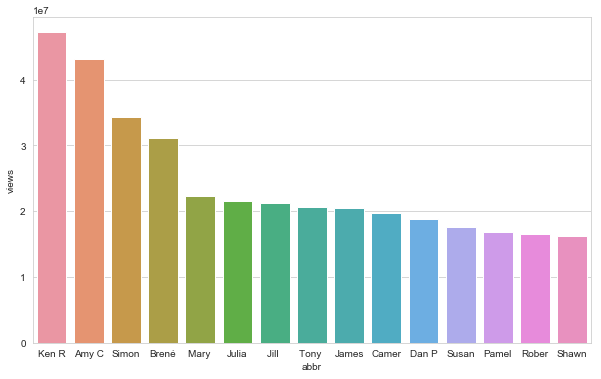

In [1288]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:5])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

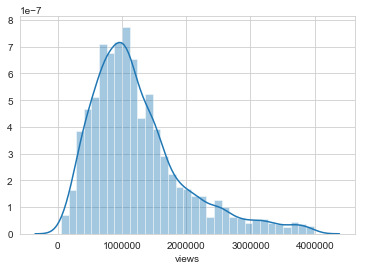

In [1289]:
sns.distplot(df[df['views'] < 0.4e7]['views'])
df['views'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

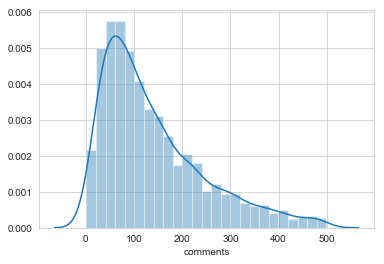

In [1290]:
sns.distplot(df[df['comments'] < 500]['comments'])
df['comments'].describe()

,title,main_speaker,views,comments
139,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
210,Science can answer moral questions,Sam Harris,3433437,3356
6,My stroke of insight,Jill Bolte Taylor,21190883,2877
433,How do you explain consciousness?,David Chalmers,2162764,2673
566,Taking imagination seriously,Janet Echelman,1832930,2492
559,On reading the Koran,Lesley Hazleton,1847256,2374
1,Your body language may shape who you are,Amy Cuddy,43155405,2290
562,The danger of science denial,Michael Specter,1838628,2272
2,How great leaders inspire action,Simon Sinek,34309432,1930


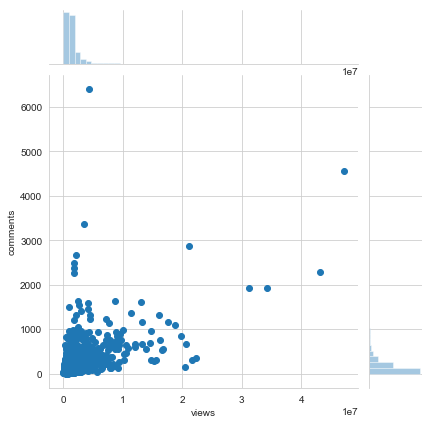

In [1291]:
sns.jointplot(x='views', y='comments', data=df)
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

In [1292]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


In [1293]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
139,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
210,Science can answer moral questions,Sam Harris,3433437,3356
6,My stroke of insight,Jill Bolte Taylor,21190883,2877
433,How do you explain consciousness?,David Chalmers,2162764,2673
566,Taking imagination seriously,Janet Echelman,1832930,2492
559,On reading the Koran,Lesley Hazleton,1847256,2374
1,Your body language may shape who you are,Amy Cuddy,43155405,2290
562,The danger of science denial,Michael Specter,1838628,2272
2,How great leaders inspire action,Simon Sinek,34309432,1930


In [1294]:
df['dis_quo'] = df['comments']/df['views']
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
2481,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
2222,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
139,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
1390,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
566,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
559,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
2332,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
433,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
562,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
2298,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


In [1295]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


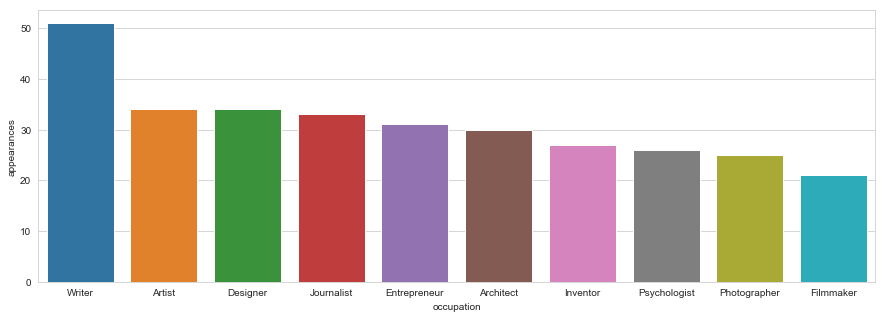

In [1296]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

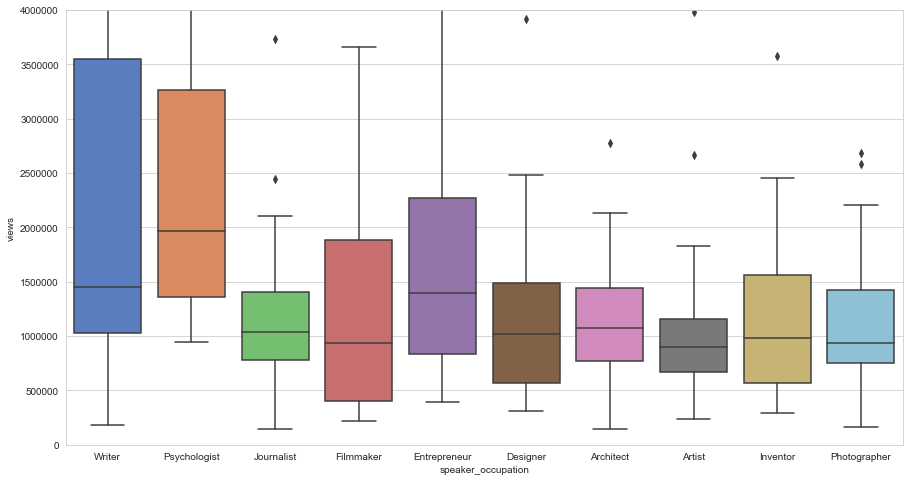

In [1297]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()


In [1298]:
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


In [1299]:
df['languages'].describe()
df[df['languages'] == 72]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,published_date.1,related_talks,speaker_occupation,tags,title,url,views,dis_quo
43,736,"Is there something you've always meant to do, ...",207,TED2011,03-03-2011,72,Matt Cutts,Matt Cutts: Try something new for 30 days,1,01-07-2011,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",Technologist,"['culture', 'success']",Try something new for 30 days,https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083


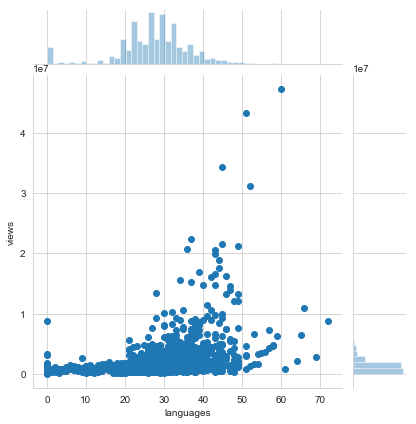

In [1300]:
sns.jointplot(x='languages', y='views', data=df)
plt.show()

In [1301]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,published_date.1,related_talks,speaker_occupation,title,url,views,dis_quo,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1670,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,education


In [1302]:
len(theme_df['theme'].value_counts())



416

In [1303]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)


,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


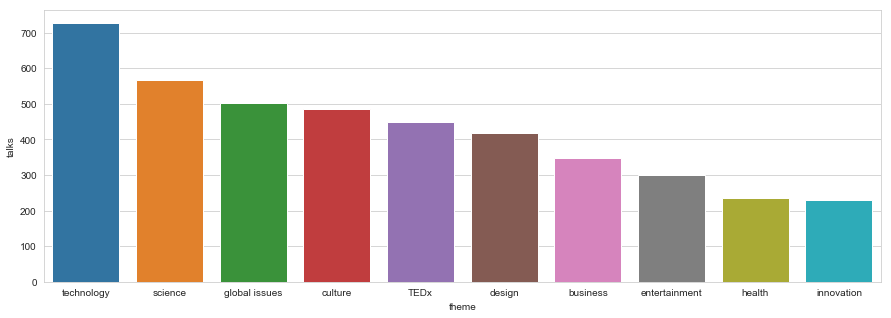

In [1304]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

In [1305]:
df['duration'] = df['duration']/60
df['duration'].describe()

count    2550.000000
mean       13.778477
std         6.238706
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

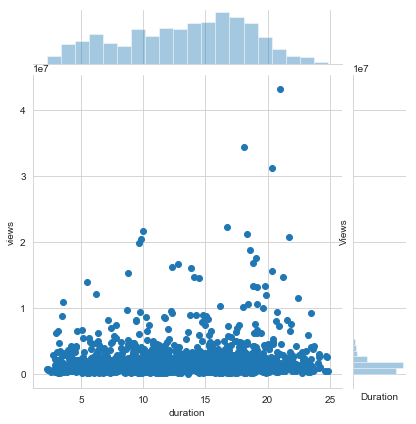

In [1306]:
df[df['duration'] == 2.25]
df[df['duration'] == 87.6]
sns.jointplot(x='duration', y='views', data=df[df['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

In [1307]:
df2 = pd.read_csv(r'C:\Users\Papa Rao\Desktop\PROJECT\tedtalks\transcripts.csv')
df2.head()



,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [1308]:
df3 = pd.merge(left=df,right=df2, how='left', left_on='url', right_on='url')
df3.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,published_date.1,related_talks,speaker_occupation,tags,title,url,views,dis_quo,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,27.833333,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Good morning. How are you?(Laughter)It's been ...
1,2290,"Body language affects how others see us, but i...",21.033333,TEDGlobal 2012,26-06-2012,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,01-10-2012,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"[body language, brain, business, psychology, s...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405,0.000053,So I want to start by offering you a free no-t...
2,1930,Simon Sinek has a simple but powerful model fo...,18.066667,TEDxPuget Sound,17-09-2009,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,04-05-2010,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"[TEDx, business, entrepreneur, leadership, suc...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432,0.000056,How do you explain when things don't go as we ...
3,1927,Brené Brown studies human connection -- our ab...,20.316667,TEDxHouston,06-06-2010,52,Brené Brown,Brené Brown: The power of vulnerability,1,23-12-2010,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"[TEDx, communication, culture, depression, fea...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150,0.000062,"So, I'll start with this: a couple years ago, ..."
4,354,"""Bonk"" author Mary Roach delves into obscure s...",16.716667,TED2009,06-02-2009,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,20-05-2009,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"[books, culture, history, humor, science, sex,...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883,0.000016,Alright. I'm going to show you a couple of ima...


In [1309]:
df3['transcript'] = df3['transcript'].fillna('')
df3['wc'] = df3['transcript'].apply(lambda x: len(x.split()))
df3['wc'].describe()

count    2553.000000
mean     1971.550725
std      1009.494329
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: wc, dtype: float64

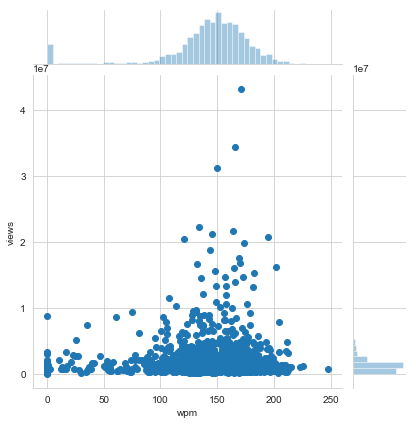

In [1310]:
df3['wpm'] = df3['wc']/df3['duration']
df3['wpm'].describe()
df3[df3['wpm'] > 245]
sns.jointplot(x='wpm', y='views', data=df3[df3['duration'] < 25])
plt.show()

In [1313]:
df.iloc[1]['published_date.1']

In [1315]:
df['published_date.1'] = df['published_date.1'].apply(lambda x: ast.literal_eval(x))
df['funny'] = df['published_date.1'].apply(lambda x: x[0]['count'])
df['jawdrop'] = df['published_date.1'].apply(lambda x: x[-3]['count'])
df['beautiful'] = df['published_date.1'].apply(lambda x: x[3]['count'])
df['confusing'] = df['published_date.1'].apply(lambda x: x[2]['count'])
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,dis_quo,funny,jawdrop,beautiful,confusing
0,4553,Sir Ken Robinson makes an entertaining and pro...,27.833333,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,19645,1174,3253,6073
1,2290,"Body language affects how others see us, but i...",21.033333,TEDGlobal 2012,26-06-2012,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,01-10-2012,...,Social psychologist,"[body language, brain, business, psychology, s...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405,0.000053,3586,335,6217,11111
2,1930,Simon Sinek has a simple but powerful model fo...,18.066667,TEDxPuget Sound,17-09-2009,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,04-05-2010,...,Leadership expert,"[TEDx, business, entrepreneur, leadership, suc...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432,0.000056,930,1161,8845,390
3,1927,Brené Brown studies human connection -- our ab...,20.316667,TEDxHouston,06-06-2010,52,Brené Brown,Brené Brown: The power of vulnerability,1,23-12-2010,...,Vulnerability researcher,"[TEDx, communication, culture, depression, fea...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150,0.000062,21444,155,4638,7942
4,354,"""Bonk"" author Mary Roach delves into obscure s...",16.716667,TED2009,06-02-2009,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,20-05-2009,...,Writer,"[books, culture, history, humor, science, sex,...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883,0.000016,363,209,1752,519


In [1316]:
df[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False)[:10]


,title,main_speaker,views,published_date,funny
3,The power of vulnerability,Brené Brown,31168150,23-12-2010,21444
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,19645
44,How to live before you die,Steve Jobs,8744428,06-10-2011,17290
6,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,14447
14,The happy secret to better work,Shawn Achor,16209727,02-02-2012,11213
27,The price of shame,Monica Lewinsky,11443190,21-03-2015,8668
13,What makes a good life? Lessons from the longe...,Robert Waldinger,16601927,24-12-2015,8590
67,Why good leaders make you feel safe,Simon Sinek,6803938,19-05-2014,8569
15,The thrilling potential of SixthSense technology,Pranav Mistry,16097077,16-11-2009,8416
21,Underwater astonishments,David Gallo,13926113,11-01-2008,8328


In [1317]:
df[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending=False)[:10]


,title,main_speaker,views,published_date,beautiful
6,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,9437
2,How great leaders inspire action,Simon Sinek,34309432,04-05-2010,8845
24,Your elusive creative genius,Elizabeth Gilbert,13155478,09-02-2009,8130
18,Inside the mind of a master procrastinator,Tim Urban,14745406,16-03-2016,7445
14,The happy secret to better work,Shawn Achor,16209727,02-02-2012,7315
128,Which country does the most good for the world?,Simon Anholt,4548276,02-07-2014,6390
1,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,6217
10,The puzzle of motivation,Dan Pink,18830983,24-08-2009,4797
56,Teach every child about food,Jamie Oliver,7638978,11-02-2010,4779
15,The thrilling potential of SixthSense technology,Pranav Mistry,16097077,16-11-2009,4702


In [1321]:
df[['title', 'main_speaker', 'views', 'published_date', 'jawdrop']].sort_values('jawdrop', ascending=False)[:10]


,title,main_speaker,views,published_date,jawdrop
26,The best stats you've ever seen,Hans Rosling,12005869,28-06-2006,2542
11,The power of introverts,Susan Cain,17629275,03-03-2012,2467
24,Your elusive creative genius,Elizabeth Gilbert,13155478,09-02-2009,2093
44,How to live before you die,Steve Jobs,8744428,06-10-2011,1368
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,1174
2,How great leaders inspire action,Simon Sinek,34309432,04-05-2010,1161
19,The surprising science of happiness,Dan Gilbert,14689301,26-09-2006,1047
229,New insights on poverty,Hans Rosling,3243784,25-06-2007,828
10,The puzzle of motivation,Dan Pink,18830983,24-08-2009,825
83,Why you will fail to have a great career,Larry Smith,5917201,11-03-2012,752


In [1322]:
df[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending=False)[:10]


,title,main_speaker,views,published_date,confusing
1,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,11111
6,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008,10464
11,The power of introverts,Susan Cain,17629275,03-03-2012,10218
37,The transformative power of classical music,Benjamin Zander,9315483,25-06-2008,8108
3,The power of vulnerability,Brené Brown,31168150,23-12-2010,7942
1999,Building a park in the sky,Robert Hammond,704205,30-06-2011,6685
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006,6073
69,3 things I learned while my plane crashed,Ric Elias,6636475,22-04-2011,5834
21,Underwater astonishments,David Gallo,13926113,11-01-2008,5201
5,How to speak so that people want to listen,Julian Treasure,21594632,27-06-2014,5167


In [1323]:
df['month'] = df['film_date'].apply(lambda x:month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

In [1319]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,dis_quo,funny,jawdrop,beautiful,confusing,month
0,4553,Sir Ken Robinson makes an entertaining and pro...,27.833333,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,...,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,19645,1174,3253,6073,Feb
1,2290,"Body language affects how others see us, but i...",21.033333,TEDGlobal 2012,26-06-2012,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,01-10-2012,...,"[body language, brain, business, psychology, s...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405,0.000053,3586,335,6217,11111,Jun
2,1930,Simon Sinek has a simple but powerful model fo...,18.066667,TEDxPuget Sound,17-09-2009,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,04-05-2010,...,"[TEDx, business, entrepreneur, leadership, suc...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432,0.000056,930,1161,8845,390,Sep
3,1927,Brené Brown studies human connection -- our ab...,20.316667,TEDxHouston,06-06-2010,52,Brené Brown,Brené Brown: The power of vulnerability,1,23-12-2010,...,"[TEDx, communication, culture, depression, fea...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150,0.000062,21444,155,4638,7942,Jun
4,354,"""Bonk"" author Mary Roach delves into obscure s...",16.716667,TED2009,06-02-2009,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,20-05-2009,...,"[books, culture, history, humor, science, sex,...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883,0.000016,363,209,1752,519,Feb
5,297,"Have you ever felt like you're talking, but no...",9.966667,TEDGlobal 2013,10-06-2013,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,27-06-2014,...,"[culture, sound, speech]",How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632,0.000014,2678,153,1801,5167,Jun
6,2877,Jill Bolte Taylor got a research opportunity f...,18.316667,TED2008,27-02-2008,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,12-03-2008,...,"[biology, brain, consciousness, global issues,...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883,0.000136,14447,550,9437,10464,Feb
7,672,"Tony Robbins discusses the ""invisible forces"" ...",21.750000,TED2006,02-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,28-06-2006,...,"[business, culture, entertainment, goal-settin...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,0.000032,1102,441,301,377,Feb
8,150,"Suspicious emails: unclaimed insurance bonds, ...",9.800000,TEDGlobal>Geneva,08-12-2015,43,James Veitch,James Veitch: This is what happens when you re...,1,09-01-2016,...,"[comedy, communication, curiosity, humor, tech...",This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_this_is...,20475972,0.000007,7731,417,401,939,Dec
9,846,Cameron Russell admits she won “a genetic lott...,9.616667,TEDxMidAtlantic,27-10-2012,43,Cameron Russell,Cameron Russell: Looks aren't everything. Beli...,1,17-01-2013,...,"[TEDx, beauty, culture, fashion, photography]","Looks aren't everything. Believe me, I'm a model.",https://www.ted.com/talks/cameron_russell_look...,19787465,0.000043,92,77,986,612,Oct


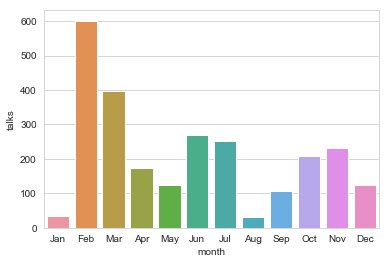

In [1320]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)